# <center> Proyecto Personal I. </center>
<center>Alexis Villalobos Loría (B98501). </center>
<center>Fecha de entrega: 18 de Septiembre del 2021.</center>
    
# Datos iniciales del problema:
    
   - Diámetro de la esfera: $D \ = \ 5.0  \ cm$
    
   - Radio de la esfera: $R \ = \ 2.5 \ cm$
    
   - Temperatura interna del horno: $T_H \ = \ 220 \ ^{\circ}C$
    
   - Temperatura interna final de la papa: $T_L \ = \ 100 \ ^{\circ}C$
    
   - Temperatura inicial de la papa al ambiente: $T_P \ = \ 25 \ ^{\circ}C$
    
# Condiciones contorno:

   - Para r = 0, $T\left(0,t\right) = T_i(t)$, lo cual representa la temperatura dentro de la papa.
   - Para r = R, $T\left(R,t\right) = hA\left(T_H - T_{Superficie}\right)$
   - Para t = $\infty$, $T\left(r, \infty\right) = T_H \ = \ T_L \ = \ 220 \ ^{\circ}C$
   - La tempreatura interna del horno es constante,sin reflujos.
   
   
# Supociciones:

   - La papa es perfectamente esférica y uniforme.
   - Es perfectamente simétrica y la difusividad térmica se da de forma radial.
   - Es un modelo unidimensional.
   - Al hornearse la papa, esta no se deshidrata.
   - El interior del horno no posee variaciones, es decir no ocurren fenómenos como el reflujo.

# Ecuación para la conducción de calor en estado no estacionario:

$$ \frac{dT}{dt} = \alpha\frac{1}{r^2}\frac{d}{dr}\left(r^2\frac{dt}{dr}\right) $$

La podemos expresar como:

$$ \frac{dT}{dt} = \alpha\left(\frac{d^2T}{dr^2}+\frac{2}{r}\frac{dT}{dr}\right) $$

Despejando para comenzar la discrtización tenemos:

$$ \frac{1}{\alpha}\frac{dT}{dt} = \frac{d^2T}{dr^2}+\frac{2}{r}\frac{dT}{dr} $$

# Discretización para la ecuación de conducción de calor para el estado no estacionario.

Para realizar la discretización de la ecuación de conducción de calor para el estado no estacionario presentada anteriormente, tendremos que elegir la derivada numérica que se empleará para dicho fin. Por lo tanto, se considerará la expresión que describe una serie de aproximaciones a las derivadas, la cual la podemos encontrar en la página 668 del libro de métodos numéricos de Chapra. Para esto, si se tomase una diferencia hacia adelante que posea un error de $O(h^2)$, tendremos:

$$\frac{dT}{dt}\approx \frac{T_i^{l+1}-T_i^l}{\Delta t}$$

Por consiguiente, se concidera tomar una diferencia centrada con un error de $O(h^2)$; por lo que, en la dimensión espacial se obtendrá lo siguiente:

$$\frac{d^2T}{dr^2}\approx \frac{T_{i+1}^l-2T_i^l+T_{i-1}^l}{\left(\Delta r\right)^2}$$

Asimismo, tendremos lo siguiente:

$$\frac{dT}{dr}\approx \frac{T_{i+1}^l-T_{i-1}^l}{2\Delta r}$$

Por lo tanto, se considerará la siguiente expresión para "r":

$$r = i \Delta r$$

Sustituyendo en la ecuación para conducción de calor para el estado no estacionario, tendremos:

$$ \frac{1}{\alpha}\frac{T_i^{l+1}-T_i^l}{\Delta t} = \frac{T_{i+1}^l-2T_i^l+T_{i-1}^l}{\left(\Delta r\right)^2}+\frac{2}{i \Delta r}\frac{T_{i+1}^l-T_{i-1}^l}{2\Delta r} $$

Al despejar para $T_i^{l+1}$, tendremos la siguiente expresión:

$$T_i^{l+1} = T_i^{l} + \frac{\alpha\Delta t}{\left(\Delta r\right)^2}\left(T_{i+1}^l-2T_i^l+T_{i-1}^l + \frac{1}{i}\left(T_{i+1}^l-T_{i-1}^l\right)\right)$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from copy import deepcopy

#Los datos iniciales tendremos:

Lr = 2.50 #cm
dr = 0.06 #cm
r = np.arange(-3*dr,Lr+dr,dr)
tf = 2000 #s
dt = 1 #s
t = np.arange(0,tf+dt,dt)
T,R = np.meshgrid(t,r)
T0 = 25 #°C

# Coeficiente de difusividad térmica de la papa ($\alpha$)

El coeficiente de difusividad térmica de la papa ronda entre los valores de los $1.33\times 10^{-7} \ \frac{m^2}{s}$ y $1.46\times 10^{-7} \ \frac{m^2}{s}$. (Solano-Cornejo, M. A., Vidaurre-Ruiz, J. M., 2017).

Por lo tanto, para fines de este proyecto, se tomará el promedio del rango de los valores para el coeficiente de difusividad térmica para la papa, el cual estará dado por:

$$\alpha = \frac{1.33\times 10^{-7} + 1.46\times 10^{-7}}{2}=1.4\times 10^{-7} \ \frac{m^2}{s}$$

Para la concordancia de dimensionalidades del calculo en el código, hacemos la conversión de $\frac{m^2}{s}$ a $\frac{cm^2}{s}$:

$$\alpha = 1.4\times 10^{-7} \ \frac{m^2}{s}\left(\frac{1 \ cm}{10^{-2} \ m}\right)^2 = 1.4\times 10^{-3} \ \frac{cm^2}{s}$$

En conclusión, el valor para $\alpha$ es de $1.4\times 10^{-3} \ \frac{cm^2}{s}$, en el código $\alpha$ se representará con "a".

In [2]:
a = 1.4e-3 #cm^2/s

# Datos adicionales:


Tomando en cuenta que la transferencia de calor del horno a la papa se da por la convección de calor a través del aire, se considera la ecuación de convección térmica, la cual es:

$$\frac{dQ}{dt}=hA_{Esfera}\left(T_{H}-T_{Superficie}\right)$$

Retomando la definición para la capacidad calorífica de un material u objeto, tendremos que $dQ=mC_p dT$, entoncespor lo tanto:

$$\frac{dTmC_p}{dt}=hA_{Esfera}\left(T_{H}-T_{Superficie}\right)$$

$$\frac{dT}{dt}=\frac{hA_{Esfera}}{mC_p}\left(T_{H}-T_{Superficie}\right)$$

Al realizar la discretización de la ecuación obtenida, tomando una diferencia hacia adelante con un error de $O(h^2)$, al despejar tendremos:

$$T_{R}^{l+1}=T_{R}^{l}+\frac{hA_{Esfera}}{mC_p}\left(T_{\infty}-T_{s}\right)\Delta t$$

Considerando que $m$ se puede obtener conociendo los valores de volumen y densidad de la papa tendremos:

$$m = V_{papa} \times \rho $$

$$m = \frac{4\pi R^3}{3} \times \rho$$

Asimismo, los parámetros $h$ (Coeficiente convectivo térmico del aire), $C_p$ (Calor específico de la papa) y $rho$ (Densidad de la papa), se tomarán de la literatura encontrada, con el fin de evitar errores como el "overflow" durante el cálculo a realizar. Estos valores están dados por:

   - Coeficiente convectivo térmico natural del aire (se toma el natural y no el forzado porque se realizó la suposición de que el aire dentro del horno está en estado estacionario) : $h \ = \ 0.015  \ \frac{W}{cm^2K}$. (Coeficiente de Transferencia de Calor Por Convección - 2011 - Ayuda de SOLIDWORKS, n.d.).
   - Calor específico de la papa: $C_p \ = \ 3520 \times 10^{-3}  \ \frac{J}{kg*K}$. (Ramos, 2014).
   - Densidad de la papa: $\rho \ = \ 0.63401 \times 10^{-3}  \ \frac{kg}{cm^3}$. (Density of Potatoes, Russet, Flesh and Skin, Raw (Includes f...14101, n.d.).


In [3]:
h = 0.0015 #W/cm^2*K
Cp = 3520 #J/kg*K
p = 0.63401e-3 #kg/cm^3
M = p*(4*np.pi*Lr**3/3) #kg
A = 4*np.pi*Lr**2

Para la realización del código, se plantea la matriz que define la temperatura según el flujo de calor en cada punto "i" (se detona con "Qi"), junto a los arreglos para las condiciones iniciales y de contorno, dados por:

In [4]:
# Matriz inicial
Qi = T0*np.ones((len(t),len(r)),float)

# condiciones iniciales
for n in range(len(r)):
    Qi[0,n] = T0

# condiciones contorno    
for m in range(len(t)-1):
    Qi[m,0]=T0
    Qi[m+1,-1]=Qi[m,-1]+h*A*(220-Qi[m,-1])*dt/(M*Cp)

Para fines de simplificar el código, consideraremos lo siguiente:

$$N = \frac{\alpha\Delta t}{\left(\Delta r\right)^2}$$

Por lo tanto, la ecuación quedaría de la siguiente manera:

$$T_i^{l+1} = T_i^{l} + N\left(T_{i+1}^l-2T_i^l+T_{i-1}^l + \frac{1}{i}\left(T_{i+1}^l-T_{i-1}^l\right)\right)$$

Con los datos presentados anteriormente, se hace una definición que me determine el valor del tiempo cuando el punto de menor temperatura de la papa alcance los 100 °C, esto está dado por:

In [5]:
def DFCP(Qi):
    Q = deepcopy(Qi)
    N = a*dt/dr**2
    tTL = 0
    for m in range(len(t)-1):
        for n in range(1,len(r)-1):
            Q[m+1,n] = Q[m,n] + N*(Q[m,n-1] - 2*Q[m,n] + Q[m,n+1]+(Q[m,n+1]-Q[m,n-1])/n)
            if -dr<=r[n]<=dr:
                if 100.15>=Q[m,n]>=99.85:
                    tTL=(m,n)
    return Q,tTL

QDF,tTL = DFCP(Qi)

t[tTL[0]],QDF[tTL[0],tTL[1]]

(1466, 100.09434044105184)

In [6]:
T1 = t[tTL[0]]
print("El valor del tiempo para cuando el punto de menor temperatura de la papa alcanza los 100 °C está dado por: t = " + str(T1) + " s")

El valor del tiempo para cuando el punto de menor temperatura de la papa alcanza los 100 °C está dado por: t = 1466 s


Una comparación gráfica del comportamiento de la temperatura de la papa dentro del horno con respecto a la posición radial en la papa y el tiempo de horneado tenemos la siguiente representación:

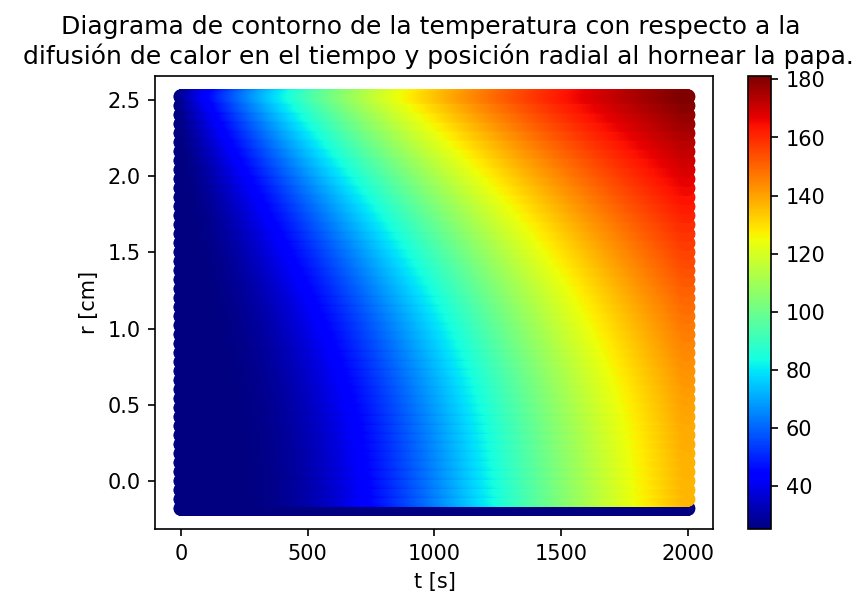

In [7]:
plt.figure(dpi=150)
plt.scatter(T,R,c=QDF.T,cmap="jet")
plt.ylabel("r [cm]")
plt.xlabel("t [s]")
plt.title("Diagrama de contorno de la temperatura con respecto a la \n difusión de calor en el tiempo y posición radial al hornear la papa.")
plt.colorbar()
plt.show()

Se presenta el diagrama de los perfiles de temperatura según la posición radial y temporal de la papa asímismo denotar la posición en el diagrama donde el punto de menor de temperatura de la papa alcanza los  $100 \ ^{\circ} C$ . El diagrama es el siguiente:

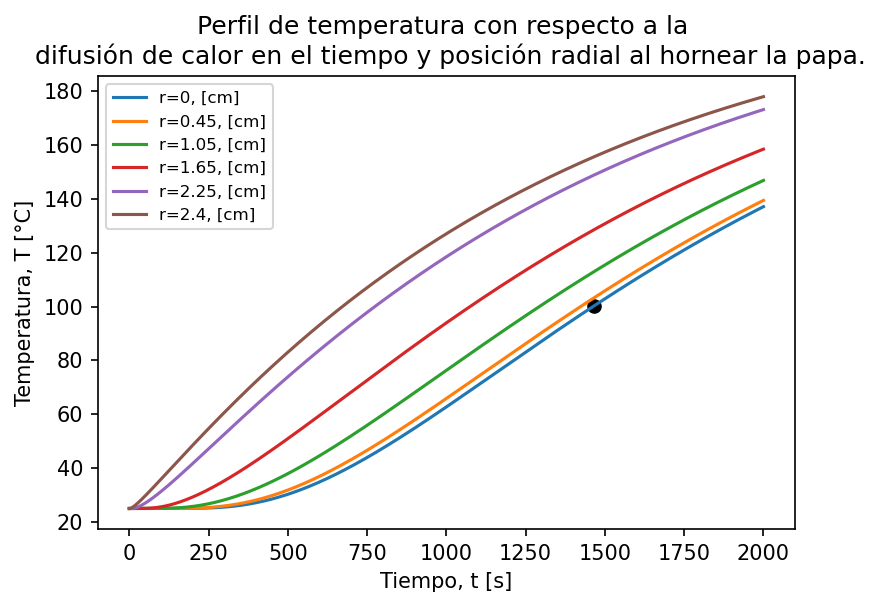

In [8]:
plt.figure(dpi=150)
plt.plot(t,QDF[:,3])
plt.plot(t,QDF[:,10])
plt.plot(t,QDF[:,20])
plt.plot(t,QDF[:,30])
plt.plot(t,QDF[:,40])
plt.plot(t,QDF[:,43])
plt.scatter(t[tTL[0]],QDF[tTL[0],tTL[1]],color="black")
plt.xlabel("Tiempo, t [s]")
plt.ylabel("Temperatura, T [°C]")
plt.legend(["r=0, [cm]","r=0.45, [cm]","r=1.05, [cm]","r=1.65, [cm]","r=2.25, [cm]","r=2.4, [cm]"], prop={'size': 8})
plt.title("Perfil de temperatura con respecto a la \n difusión de calor en el tiempo y posición radial al hornear la papa.")
plt.show()

Si se desea comparar el comportamiento obtenido con respecto a las condiciones iniciales de la difusividad de calor en la papa, tendremos el siguiente gráfico, que nos permite hacer el análisis visual comparativo de ambas situaciones. Para este se considera el momento justo en que se ingresa la papa al horno.

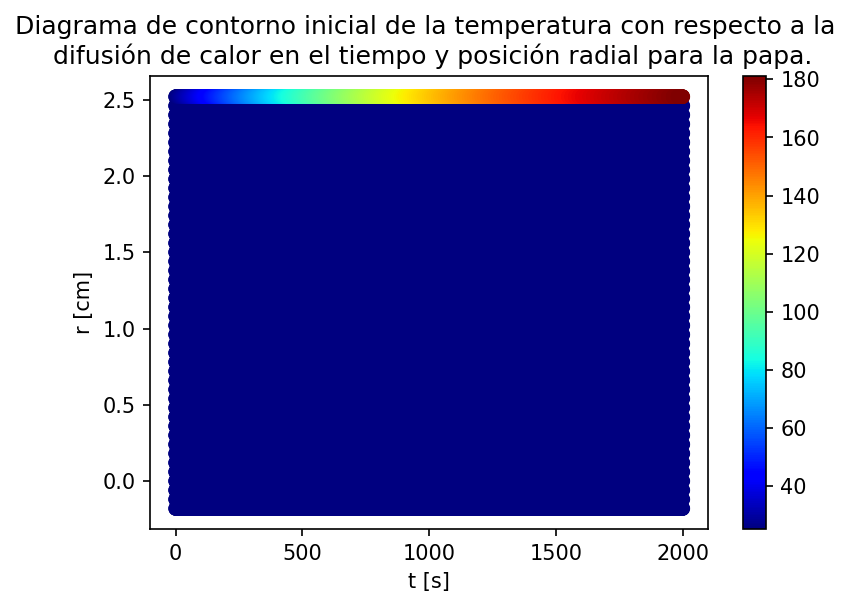

In [9]:
plt.figure(dpi=150)
plt.scatter(T,R,c=Qi.T,cmap="jet")
plt.ylabel("r [cm]")
plt.xlabel("t [s]")
plt.title("Diagrama de contorno inicial de la temperatura con respecto a la \n difusión de calor en el tiempo y posición radial para la papa.")
plt.colorbar()
plt.show()

# Análisis extra.

¿Qué pasaría si la papa estuviese inicialmente refrigerada a una temperatura de $5 \ °C$? Por lo tanto: ¿en cuánto variaría el tiempo que se requiere para alcanzar el valor de $100 \ °C$ en el punto de menor temperatura? Para esto tendremos el siguiente código:

In [10]:
T0 = 5 #°C

# Matriz inicial
Qi = T0*np.ones((len(t),len(r)),float)

# condiciones iniciales
for n in range(len(r)):
    Qi[0,n] = T0

# condiciones contorno    
for m in range(len(t)-1):
    Qi[m,0]=T0
    Qi[m+1,-1]=Qi[m,-1]+h*A*(220-Qi[m,-1])*dt/(M*Cp)
    
def DFCP(Qi):
    Q = deepcopy(Qi)
    N = a*dt/dr**2
    tTL = 0
    for m in range(len(t)-1):
        for n in range(1,len(r)-1):
            Q[m+1,n] = Q[m,n] + N*(Q[m,n-1] - 2*Q[m,n] + Q[m,n+1]+(Q[m,n+1]-Q[m,n-1])/n)
            if -dr<=r[n]<=dr:
                if 100.15>=Q[m,n]>=99.85:
                    tTL=(m,n)
    return Q,tTL

QDF,tTL = DFCP(Qi)

t[tTL[0]],QDF[tTL[0],tTL[1]]

(1614, 100.07460016413668)

In [11]:
T2 = t[tTL[0]]
print("El valor del tiempo para cuando el punto de menor temperatura de la papa alcanza los 100 °C está dado por: t = " + str(T2) + " s")


El valor del tiempo para cuando el punto de menor temperatura de la papa alcanza los 100 °C está dado por: t = 1614 s


El diagrama de Temperatura en el espacio y tiempo para este caso sería el siguiente:

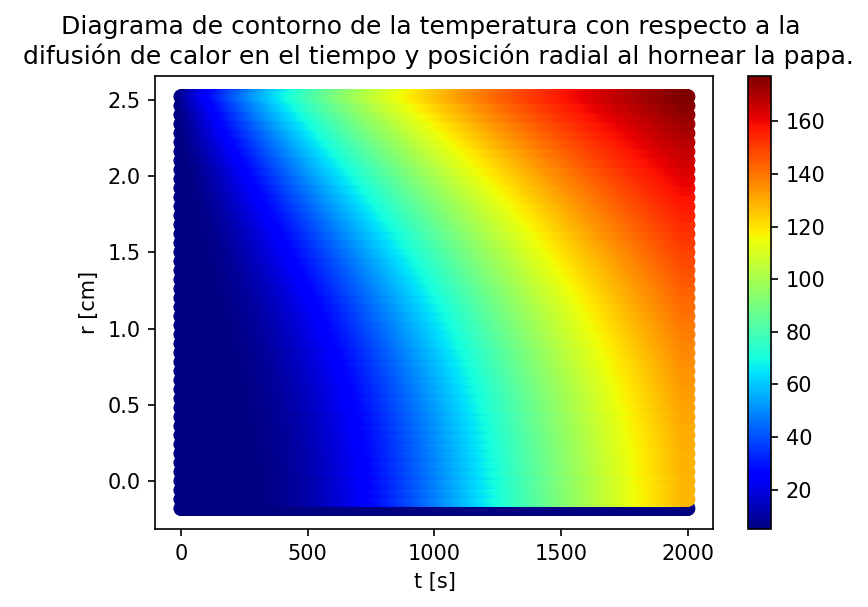

In [12]:
plt.figure(dpi=150)
plt.scatter(T,R,c=QDF.T,cmap="jet")
plt.ylabel("r [cm]")
plt.xlabel("t [s]")
plt.title("Diagrama de contorno de la temperatura con respecto a la \n difusión de calor en el tiempo y posición radial al hornear la papa.")
plt.colorbar()
plt.show()

Asimismo, como el caso anterior, podemos presentar el diagrama de los perfiles de temperatura según la posición radial y temporal de la papa asímismo denotar la posición en el diagrama donde el punto de menor de temperatura de la papa alcanza los $100 \ ^{\circ} C$. El diagrama es el siguiente:

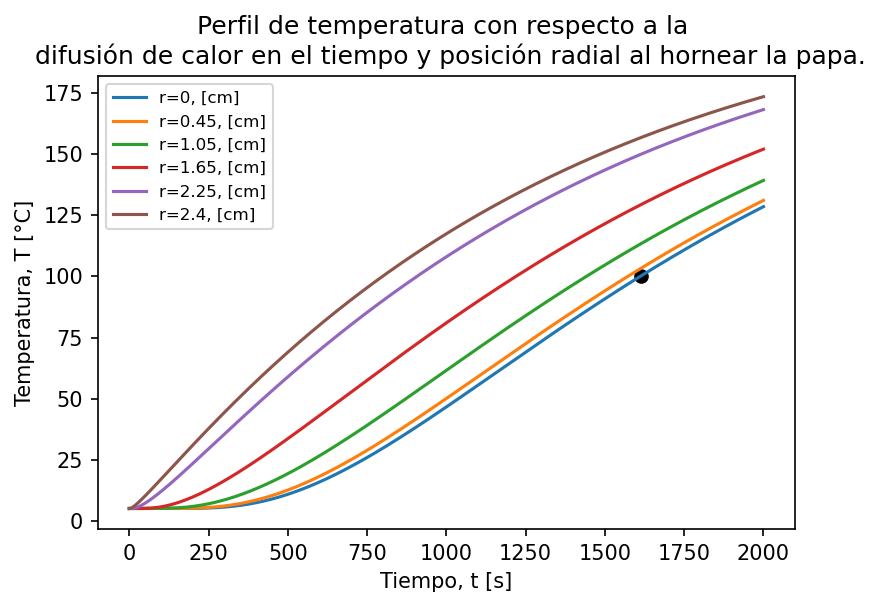

In [13]:
plt.figure(dpi=150)
plt.plot(t,QDF[:,3])
plt.plot(t,QDF[:,10])
plt.plot(t,QDF[:,20])
plt.plot(t,QDF[:,30])
plt.plot(t,QDF[:,40])
plt.plot(t,QDF[:,43])
plt.scatter(t[tTL[0]],QDF[tTL[0],tTL[1]],color="black")
plt.xlabel("Tiempo, t [s]")
plt.ylabel("Temperatura, T [°C]")
plt.title("Perfil de temperatura con respecto a la \n difusión de calor en el tiempo y posición radial al hornear la papa.")
plt.legend(["r=0, [cm]","r=0.45, [cm]","r=1.05, [cm]","r=1.65, [cm]","r=2.25, [cm]","r=2.4, [cm]"], prop={'size': 8})
plt.show()

El diagrama de Temperatura en el espacio y tiempo para este caso en las condiciones iniciales sería el siguiente:

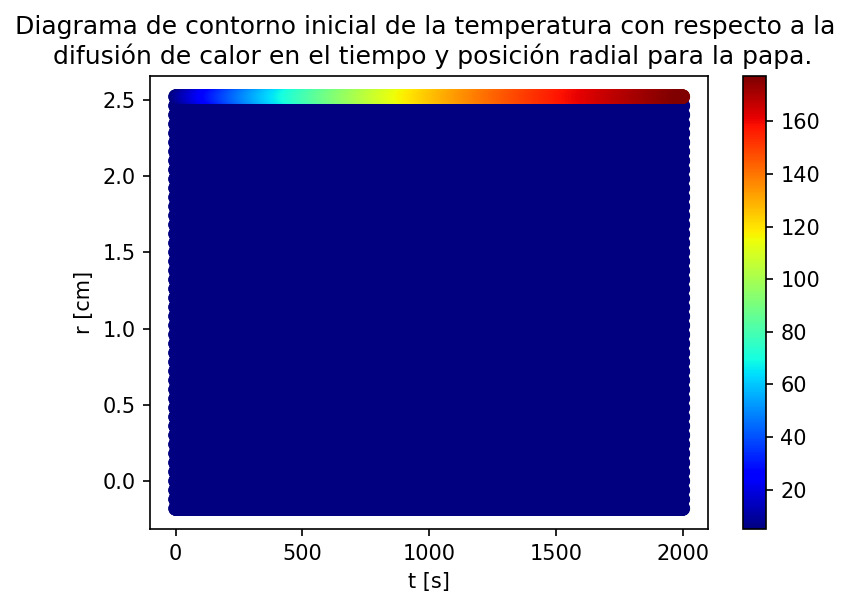

In [14]:
plt.figure(dpi=150)
plt.scatter(T,R,c=Qi.T,cmap="jet")
plt.ylabel("r [cm]")
plt.xlabel("t [s]")
plt.title("Diagrama de contorno inicial de la temperatura con respecto a la \n difusión de calor en el tiempo y posición radial para la papa.")
plt.colorbar()
plt.show()

In [15]:
print("Al anailzar la variación del tiempo de horneado de la papa, según la temperatura inicial de la misma (entre temperatura ambiente y temperatura refrigerada) es de: " + str(T2-T1) + " s." + "Por lo tanto, se concluye que si se hornea una papa refrigerada a una tempretura de 5 °C, esta tardará " + str(T2-T1) + " s más en hornease, a comparación de una papa a temperatura ambiente.") 

Al anailzar la variación del tiempo de horneado de la papa, según la temperatura inicial de la misma (entre temperatura ambiente y temperatura refrigerada) es de: 148 s.Por lo tanto, se concluye que si se hornea una papa refrigerada a una tempretura de 5 °C, esta tardará 148 s más en hornease, a comparación de una papa a temperatura ambiente.


# Conclusiones.
   
   - El tiempo transcurrido para que el punto de menor temperatura de la papa a una temperatura ambiente (temperatura del centro de la papa), alcance los 100 °C, posee un valor aproximado de t = 1466 s, lo cual se puede expresar como 24 minutos con 26 segundos.
   - Considerando que se toma un coeficiente de difusividad promedio y un coeficiente convectivo térmico del aire promedio de rangos establecido en la literatura, por lo que, se puede pensar que se posee un margen de error del tipo rectangular.
   - Asimismo, como el coeficiente de difusividad térmico de la papa en $\frac{cm^2}{s}$ es del orden de $10^{−3}$, el tiempo obtenido tiene coherencia con los datos, ya que, se espera que la conductividad del calor através de la papa de forma radial, se dé lentamente, aunque el radio de la papa sea corto; además de que el calor se transfiere por convección a la frontera de la papa (corteza). Por lo tanto, el tiempo de 24 minutos y 26 segundos está dentro de un tiempo razonable para hornear una papa.
   - El tiempo de horneado de la papa puede ser mayor al resultado obtenido; ya que, se considera que en el momento que se ingresa la papa al horno, la temperatura en su corteza es igual a la temperatura del horno, lo cual sabemos que en la realidad eso no se comporta así.
   - El comportamiento de las curvas en los gráficos de  la temperatura en el tiempo y posisción radial, es el esperado, puesto que se trabaja con un cuerpo esférico, las curvas para las distancias radiales en dicha gráfica son redondeadas; lo que nos indica que la transferencia de calor a través del tiempo solo se da de forma radial para este caso, ya que se tomó constante en theta y phi.
   - Los perfiles de temperatura nos muestra el crecimiento de la temperatura y el comportamiento del paso del calor por la transferencia en un radio específico a través del tiempo; lo cual respalda lo planteado en las gráficas de temperaturas y la transferencia de calor solo se da de forma radial en este caso.
   - Al ver el análisis extra, se deduce que la temperatura inicial de la papa v a alterar el tiempo de horneado de la misma, ya que, se tarda un tiempo de horneado de t = 1614 s para una papa a $5 \ ^{\circ}C$, lo cual son 148 s (2 minutos y 28 segundos) extra de horneado a comparación de hornear una papa a $25 \ ^{\circ}C$ (temperatura ambiente).

 
# Bibliografía.

1. Coeficiente de transferencia de calor por convección - 2011 - Ayuda de SOLIDWORKS. (n.d.). Retrieved September 25, 2021, from http://help.solidworks.com/2011/spanish/SolidWorks/cworks/LegacyHelp/Simulation/AnalysisBackground/ThermalAnalysis/Convection_Topics/Convection_Heat_Coefficient.htm
2. Density of Potatoes, russet, flesh and skin, raw (Includes f...14101. (n.d.). Retrieved September 25, 2021, from https://www.aqua-calc.com/page/density-table/substance/potatoes-coma-and-blank-russet-coma-and-blank-flesh-blank-and-blank-skin-coma-and-blank-raw-blank--op-includes-blank-foods-blank-for-blank-usda-quote-s-blank-food-blank-distribution-blank-program-cp--blank--op-diced-cp-
3. Ramos, D. (2014). Determinacion de las propiedades termanles en tres variedades de papa nativa con tres cortes de tamaños diferentes. Ciencia & Desarrollo, 1(2304–8891), 63–67. http://revistas.unjbg.edu.pe/index.php/CYD/article/view/393/344
4. Solano-Cornejo, M. A., & Vidaurre-Ruiz, J. M. (2017). VARIACIÓN DE LA DIFUSIVIDAD TÉRMICA DEL LOCHE (Cucurbita moschata Duch.), LA PAPA (Solanum tuberosum L.) Y EL CAMOTE (Ipomoea batatas L.) DURANTE EL CALENTAMIENTO. Tzhoecoen, 9(4), 7–15. https://doi.org/10.26495/rtzh179.423731
